# Moteur de recherche d'images par le contenu
## Hraghi Arij
## Ahmed Gharsallah

Pour ce premier projet, nous allons implémenter un moteur de recherche d'images par le contenu, en adoptant une approche classique pour calculer les descripteurs d'images. 
Vous pouvez commencer par suivre les étapes indiquées dans l'énoncé mais plusieurs directions permettent de poursuivre et d'améliorer le projet, à titre d'exemple:
- vous pouvez varier les espaces de représentation de la couleur
- vous pouvez utiliser d'autres distances plus adaptées que la distance euclidienne pour la comparaison d'histogrammes de couleur.
- vous pouvez utiliser d'autres descripteurs de texture comme les descripteurs de Gabor,
- vous pouvez tester d'autres bases d'images,
- etc. 


In [1]:
import numpy as np

## Indexation des images
Le premier outil à élaborer permet de calculer un index pour chaque image de la base. Un index
est un vecteur d'entiers qui décrit une image, et qui peut être traité par l'ordinateur ; pour
comparer deux images, nous comparerons leurs index associés.

1- un premier outil d'indexation des images, qui chargera les images de la base enregistrée
dans bibimage.tar, calculera pour chaque image l'index (histogramme) associé, écrira
dans un fichier les différents index ;

135.9983 44.96685757803556


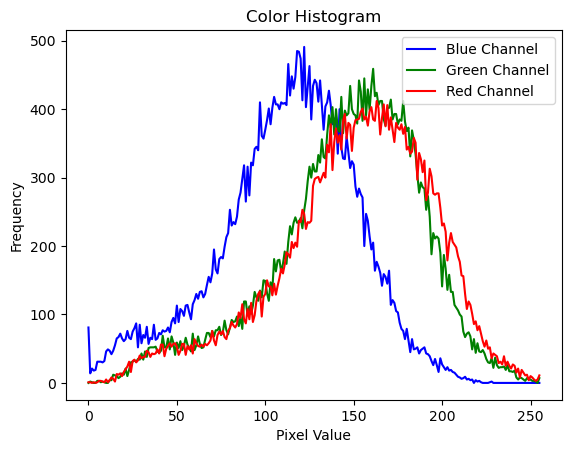

96.14779166666666 56.444867637574134


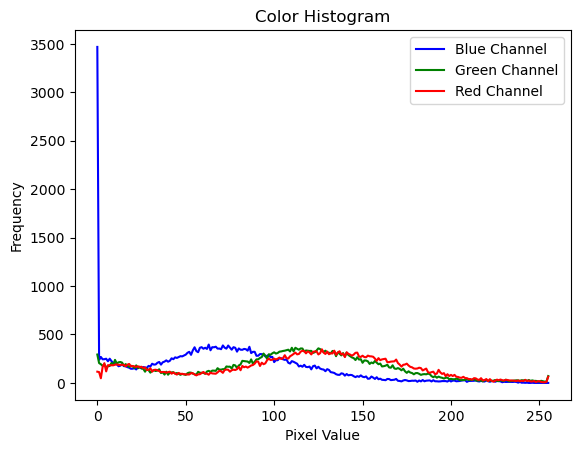

122.933175 45.35431669370302


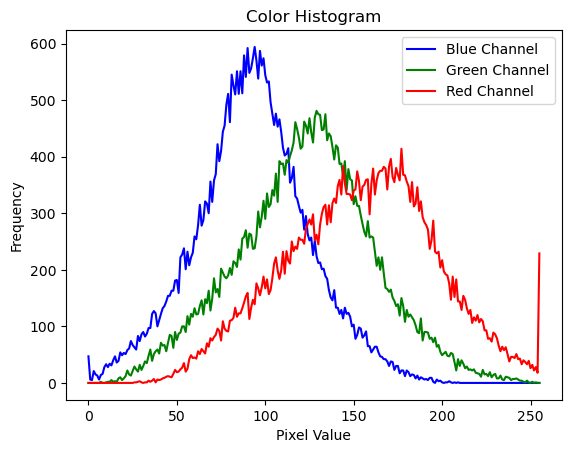

98.67945 64.0539943929924


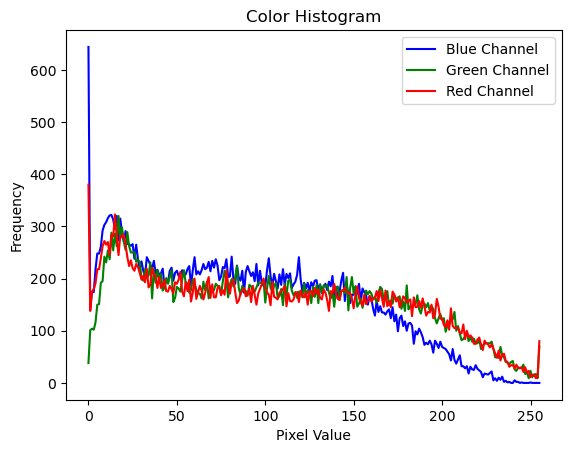

152.329675 66.04587021705224


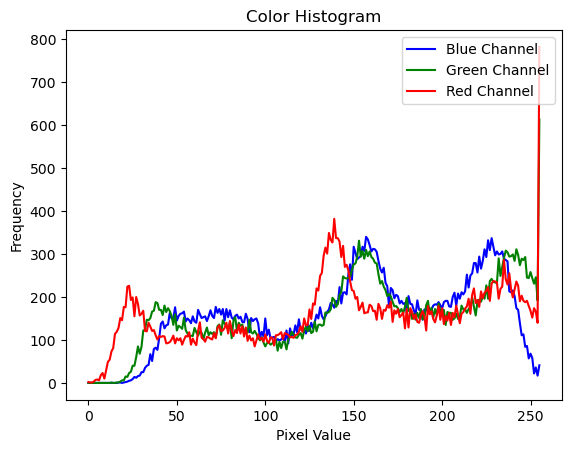

113.38310833333334 58.339996026210564


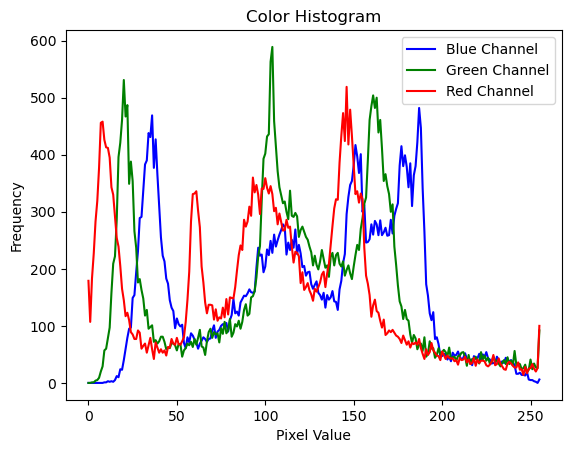

105.74825 60.11299600422663


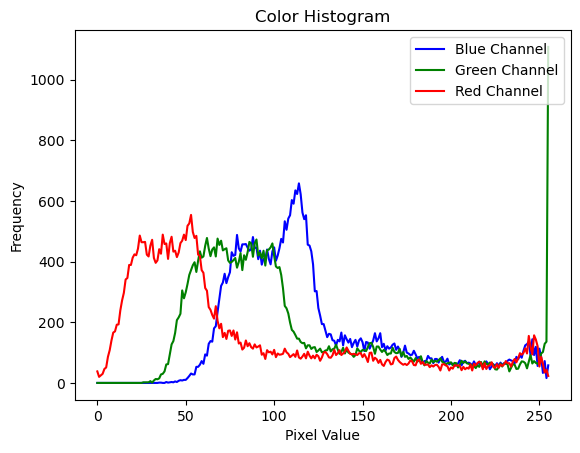

117.68710833333333 42.62406507836777


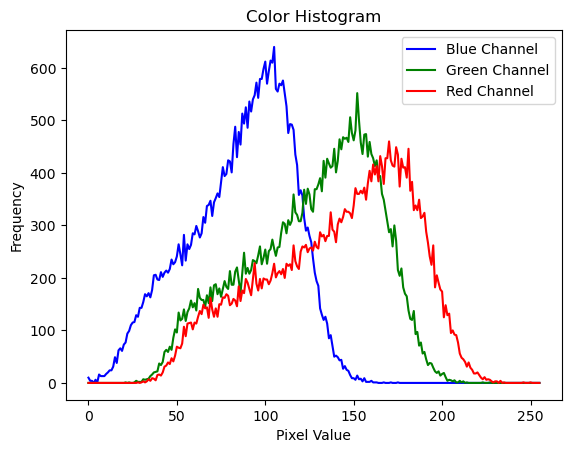

128.73640833333334 42.92507477492921


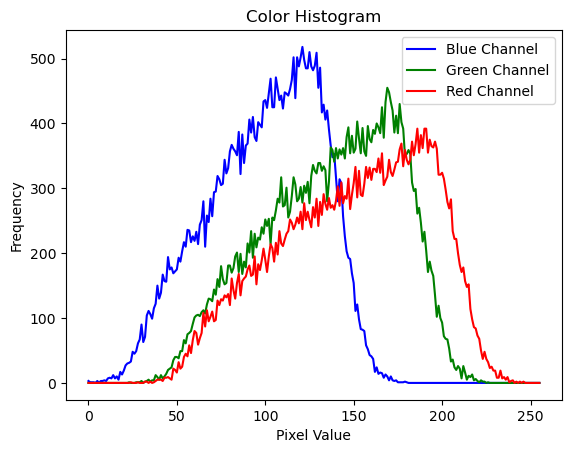

106.439575 63.21143184176452


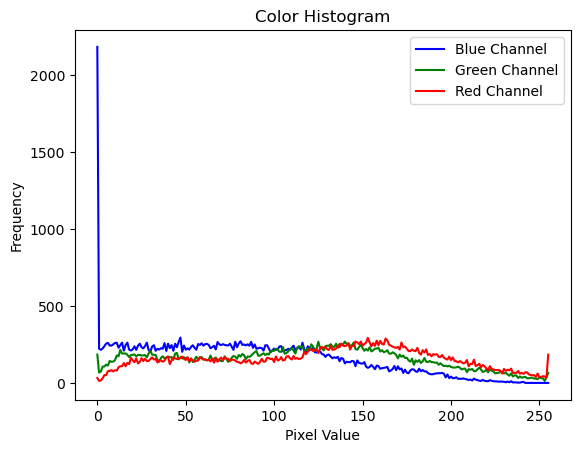

105.38425833333334 62.775690920397395


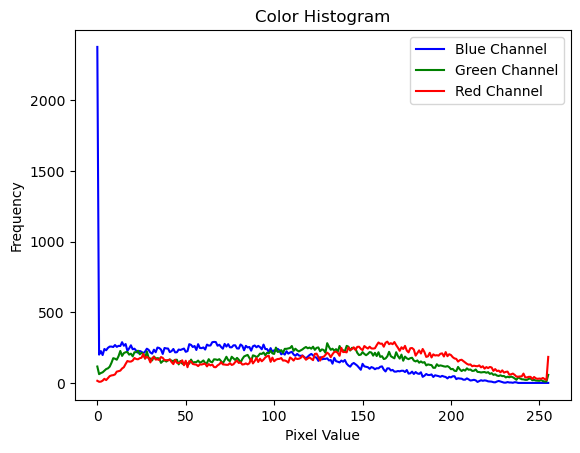

87.74911666666667 56.44353645505441


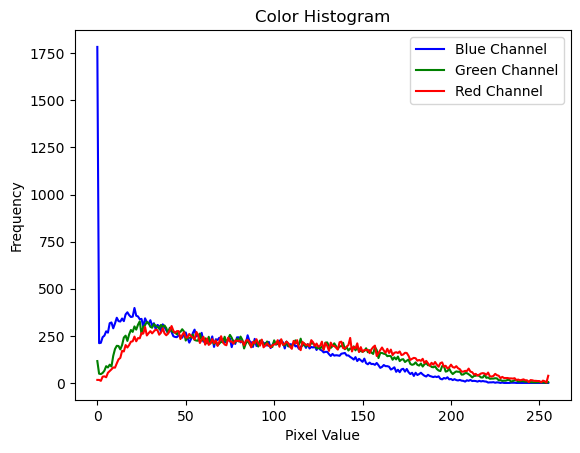

151.39910833333334 52.891365592173265


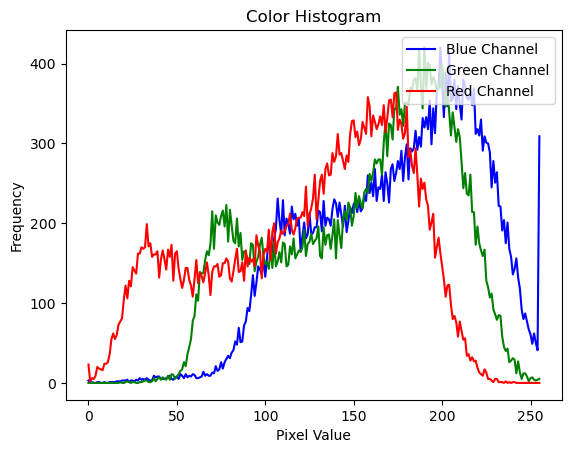

83.95431666666667 65.43059233289162


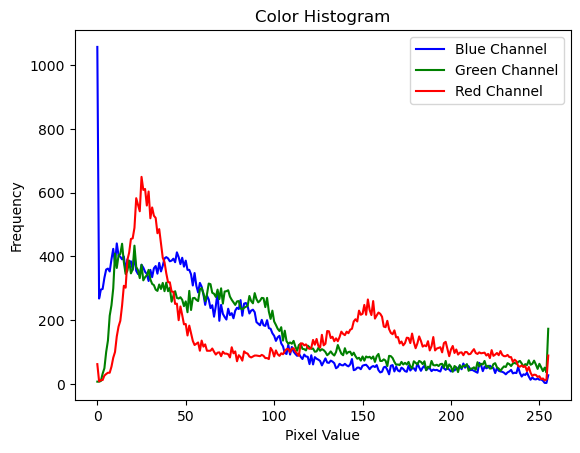

86.7327 64.69786511709641


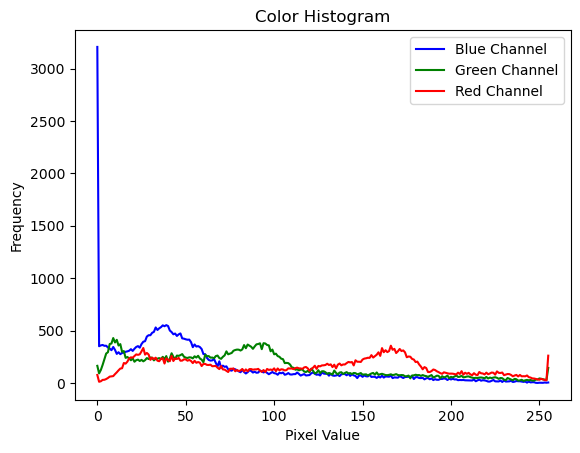

83.542825 90.03466443183264


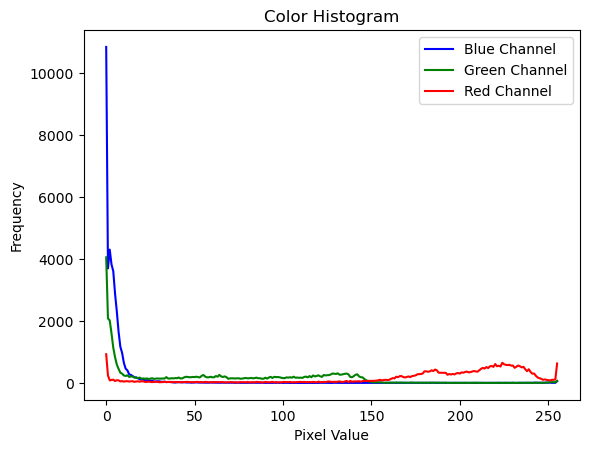

126.526075 72.05024082838106


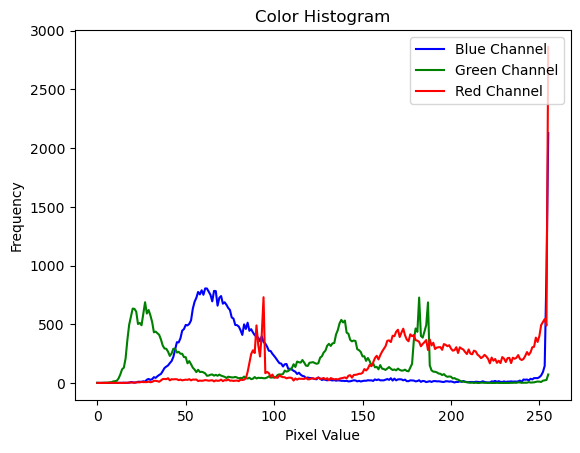

185.6647 46.869576030121436


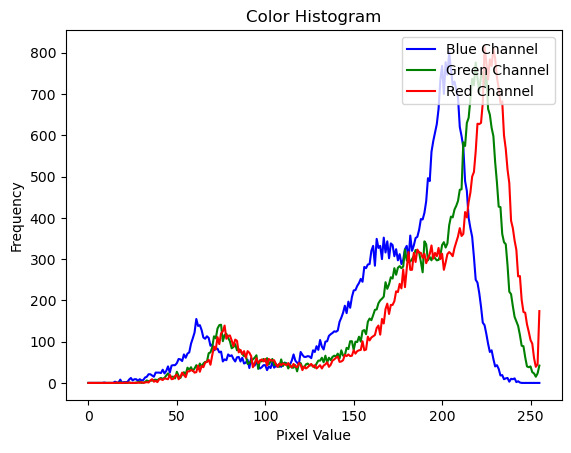

119.802825 54.3574214223416


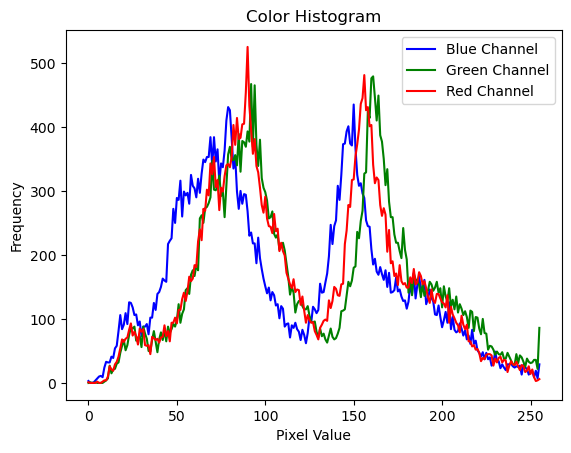

117.238925 69.82804563004066


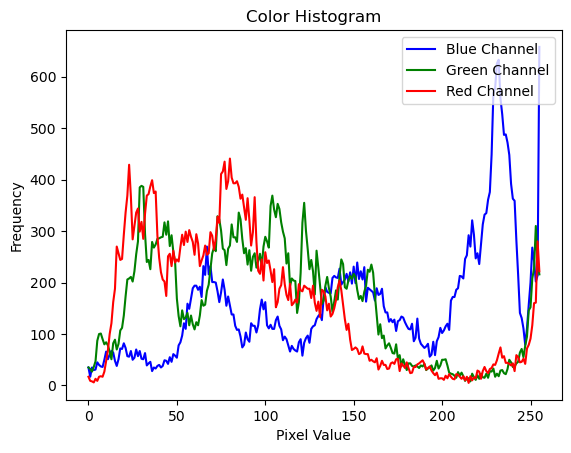

93.46888333333334 60.21173264754738


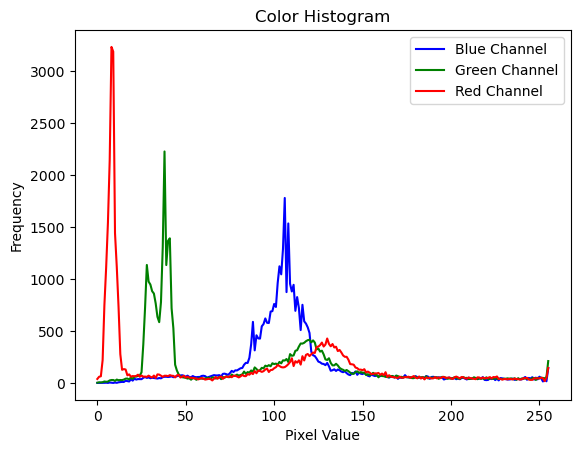

142.78645833333334 73.5313902921054


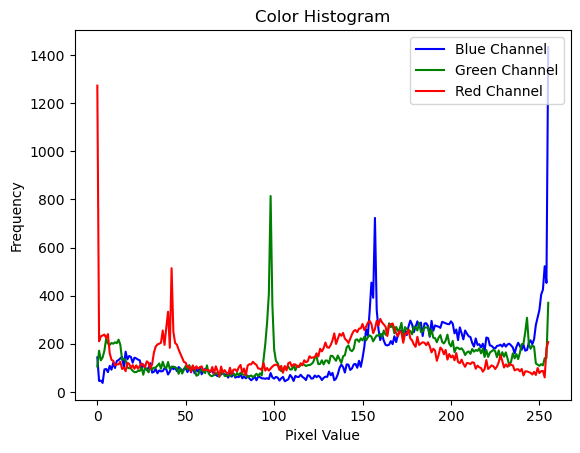

84.55085 59.25749570822947


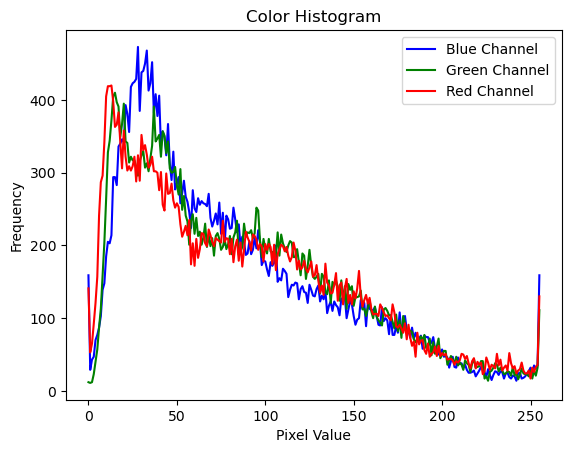

88.51915833333334 62.20780001702571


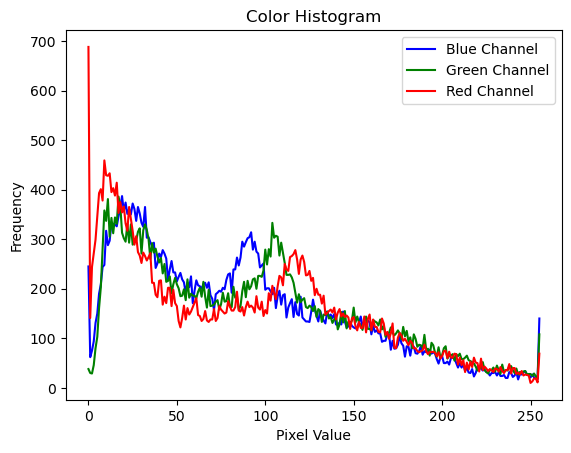

136.641575 57.405742510536705


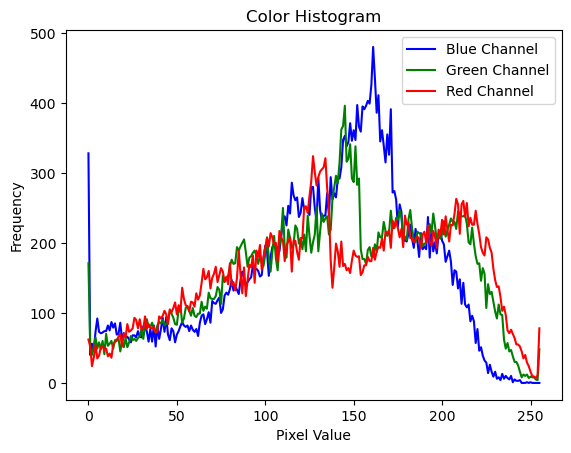

140.648825 67.52668621455798


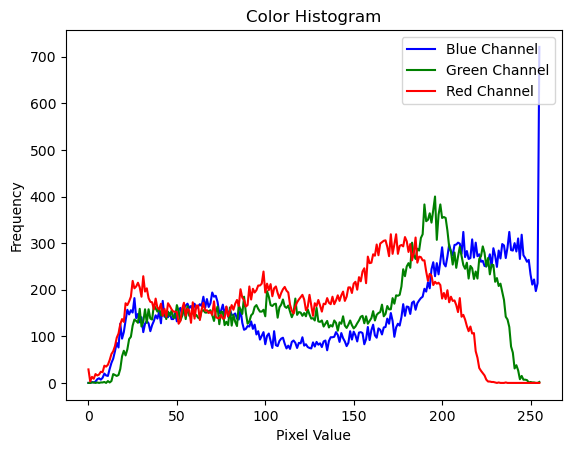

166.514425 40.18543133922262


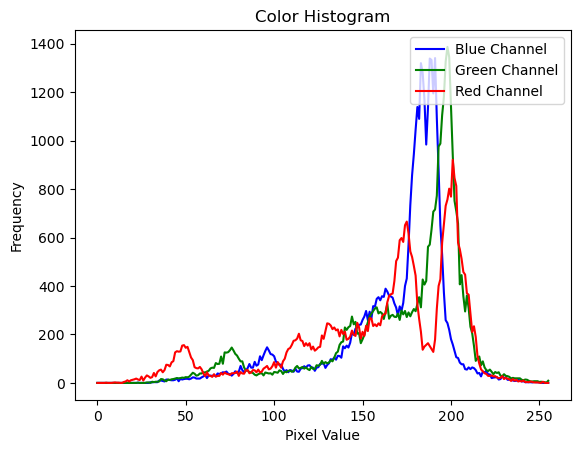

101.70225833333333 61.631078130814785


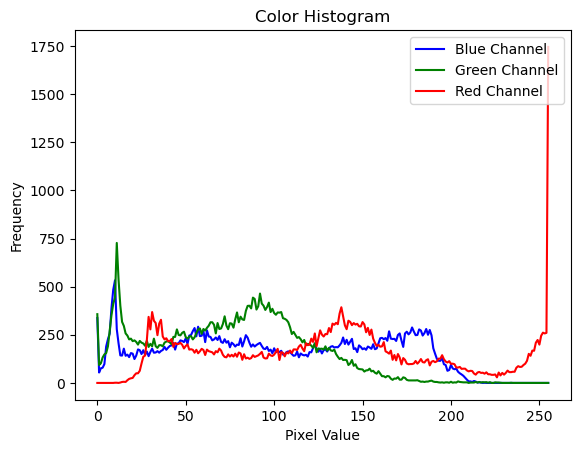

78.84230833333334 44.68341573415798


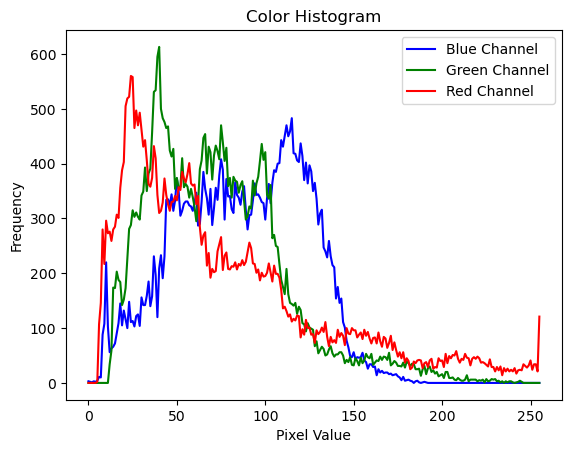

85.20731666666667 58.97406113255547


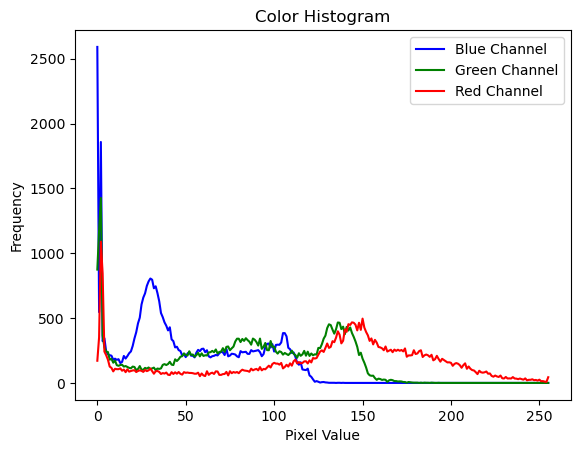

80.27205 53.02834750204366


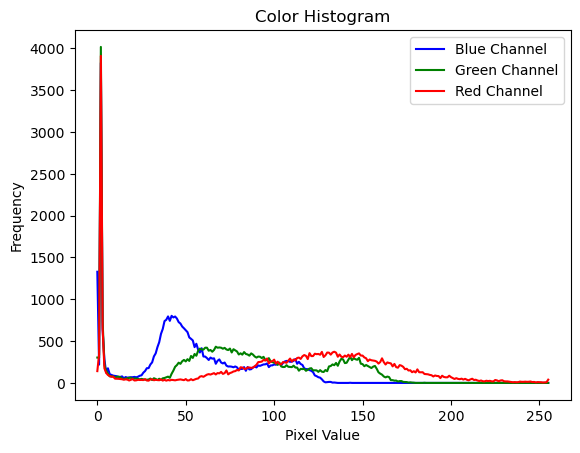

85.82251666666667 51.709905237453185


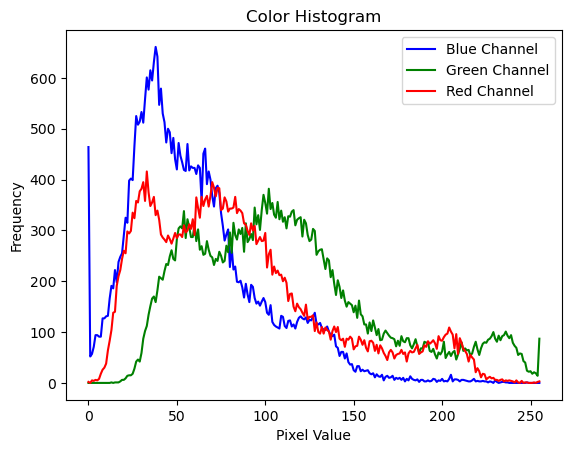

85.669775 55.5901210628535


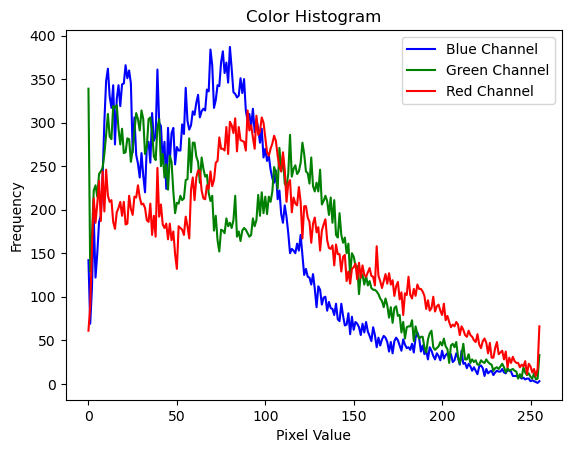

92.84701666666666 71.76888517618939


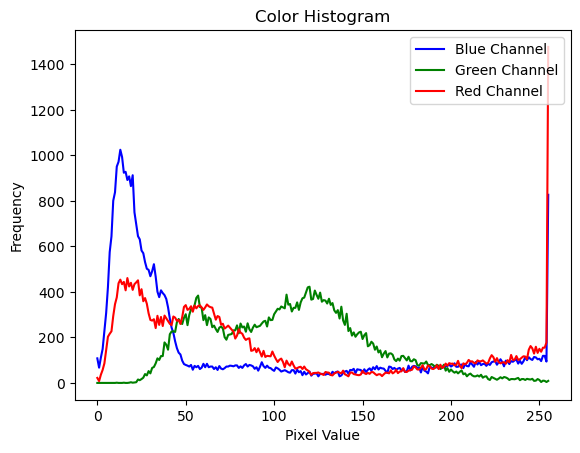

90.42684166666666 69.22493732650298


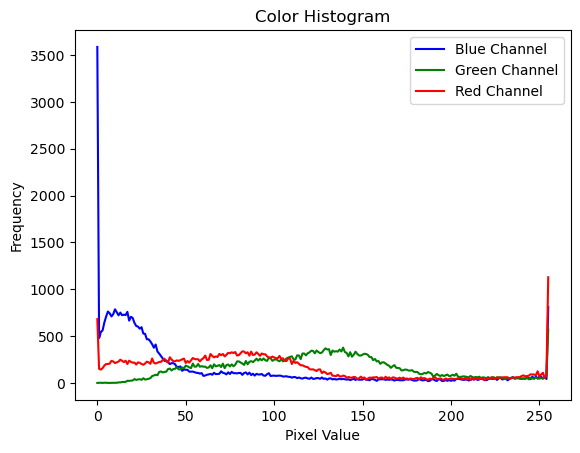

81.78603333333334 70.2381429015998


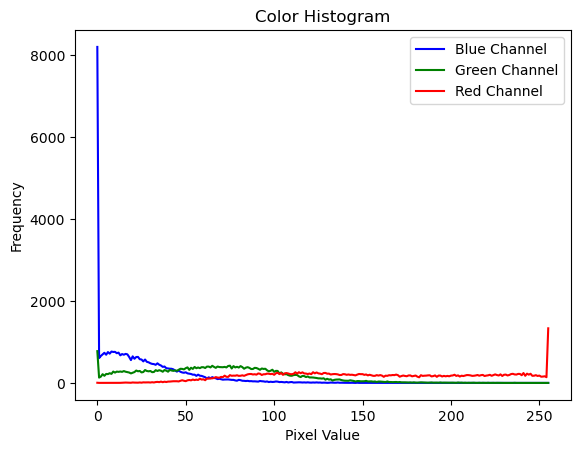

101.60584166666666 63.09000169764036


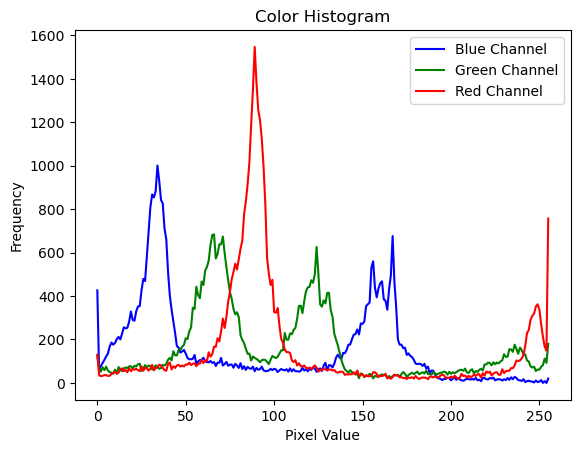

133.66700833333334 57.91962138645186


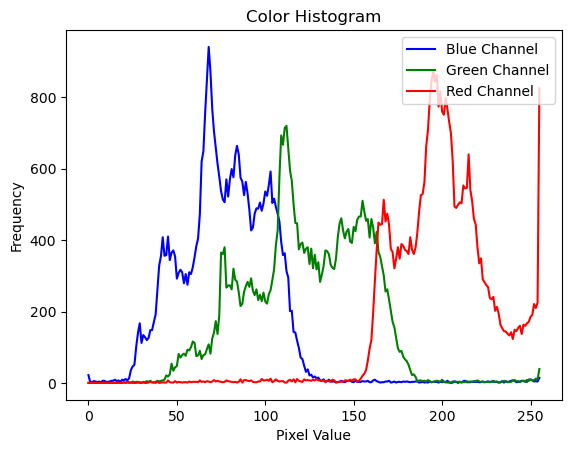

90.799225 42.67590789191689


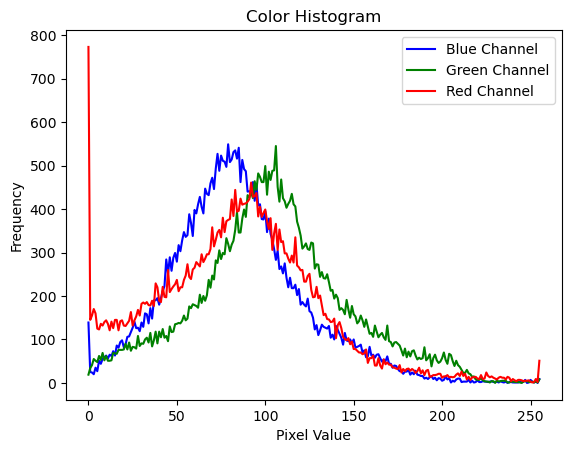

86.02313333333333 50.38809712139917


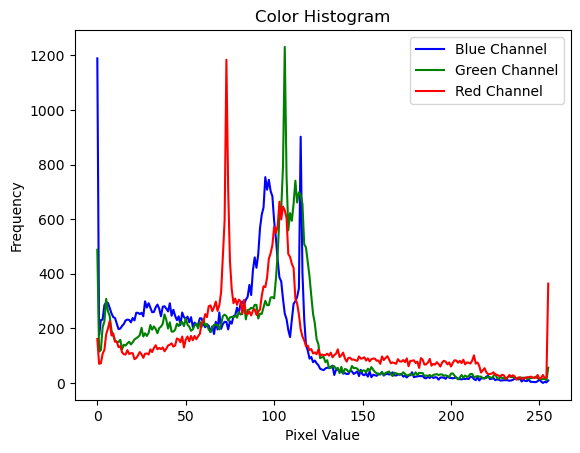

73.47871666666667 44.35873003539501


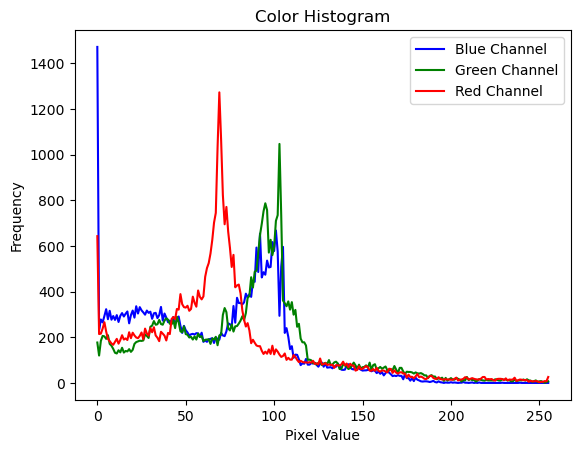

122.47519166666666 74.15989213323643


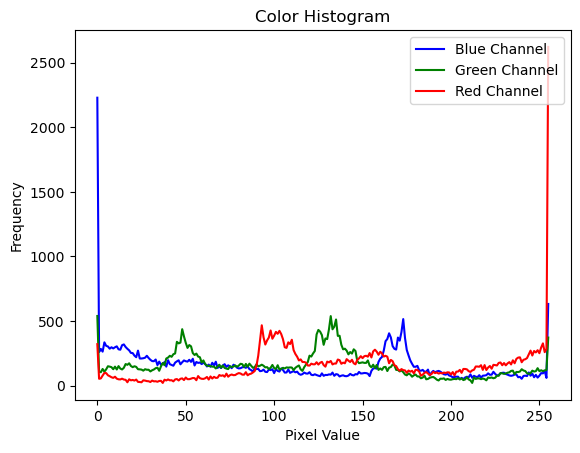

114.67658333333334 75.31814379678417


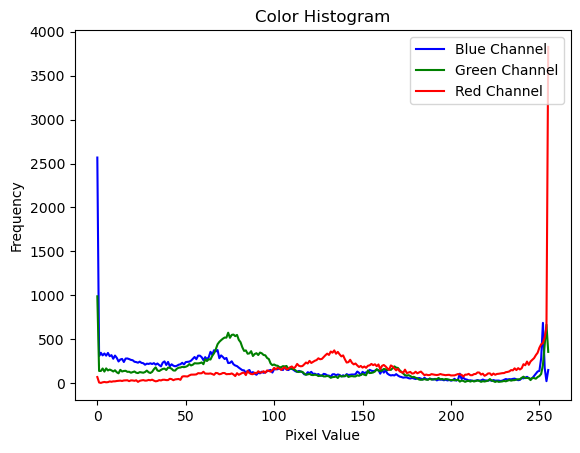

173.02795 50.07953942277724


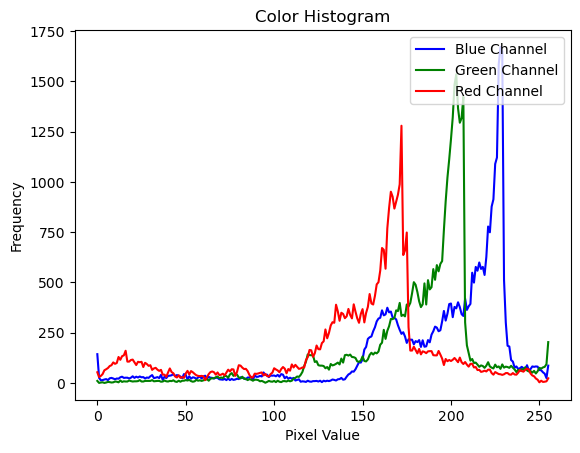

140.721 49.80005614789337


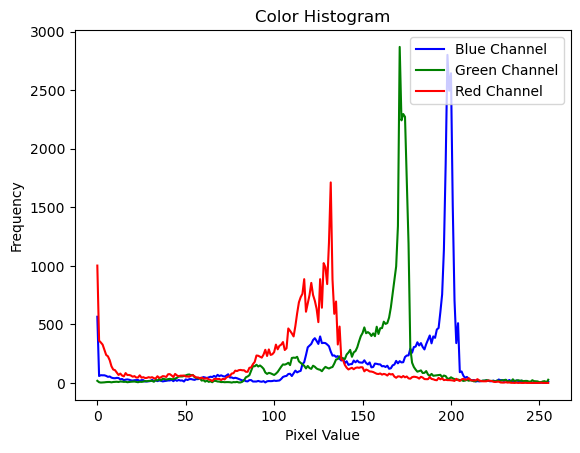

158.578475 42.246631917124965


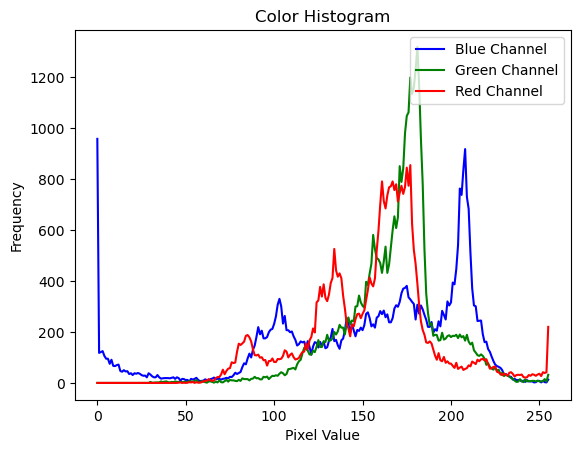

168.42699166666668 48.381164583440224


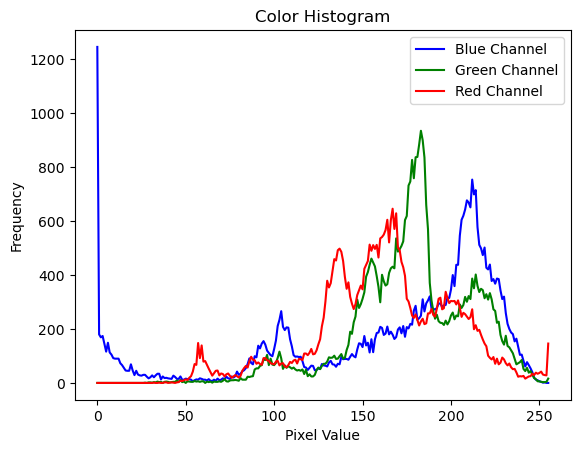

84.16090833333334 70.94250911953235


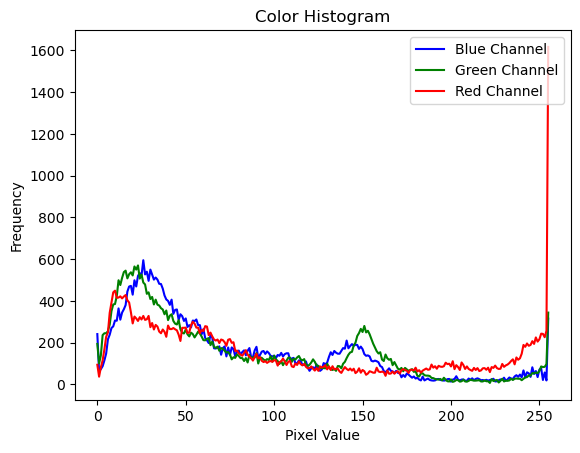

97.018925 69.6803457476428


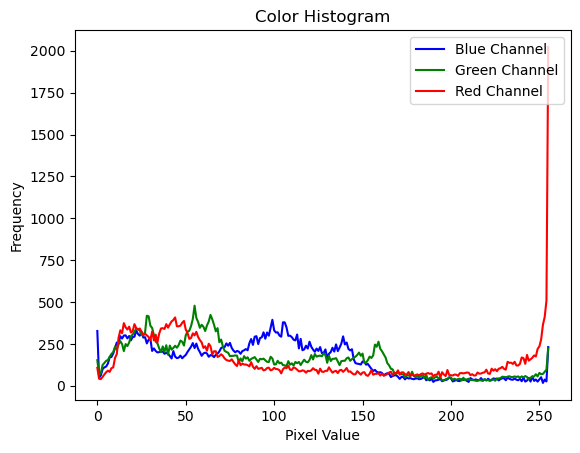

101.95705833333334 54.157224027331736


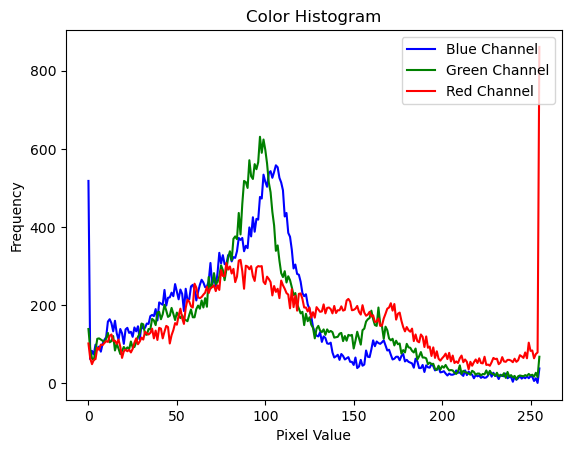

In [2]:
import os
import matplotlib.pyplot as plt 
import cv2
image_folder=r"C:\Users\Arij\Desktop\RT5\BE"

for image in  os.listdir(image_folder):
    image_path=os.path.join(image_folder,image)
    image=cv2.imread(image_path)
    blue_channel,green_channel,red_channel=cv2.split(image)
    hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
    hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
    hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])
    plt.plot(hist_blue, color='blue', label='Blue Channel')
    plt.plot(hist_green, color='green', label='Green Channel')
    plt.plot(hist_red, color='red', label='Red Channel')

    mean_intensity = np.mean(image)
    std_deviation = np.std(image)
    print(mean_intensity,std_deviation )
    plt.title('Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    
    plt.show()

In [3]:
#indexation d'image
#couleur histogramme de couleur + quantification + espace


(200, 200, 3)


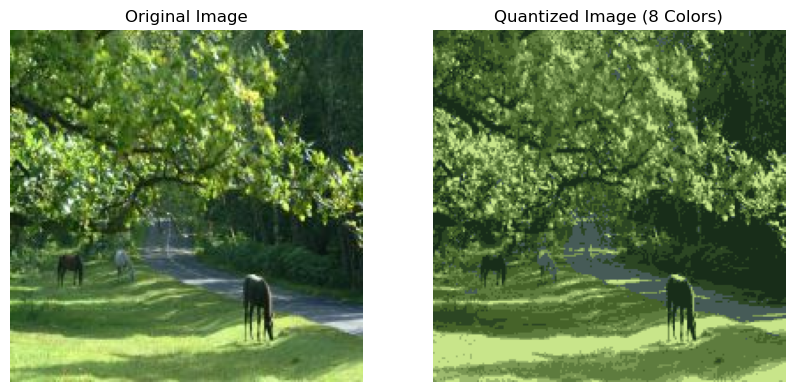

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the colored image
image = cv2.imread(r"C:\Users\Arij\Desktop\RT5\BE\32.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

print(image.shape)
pixels = image.reshape((-1, 3))


num_colors = 8
"""
check documentation: https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html
v2.TERM_CRITERIA_EPS: determines when k-means should stop
cv2.TERM_CRITERIA_MAX_ITER: max iterations

"""
#k_means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)
_, labels, centers = cv2.kmeans(pixels.astype(np.float32), num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

quantized_centers = np.uint8(centers)
quantized_image = quantized_centers[labels.flatten()].reshape(image.shape)


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(quantized_image)
plt.title(f'Quantized Image ({num_colors} Colors)')
plt.axis('off')

plt.show()


(200, 200, 3)


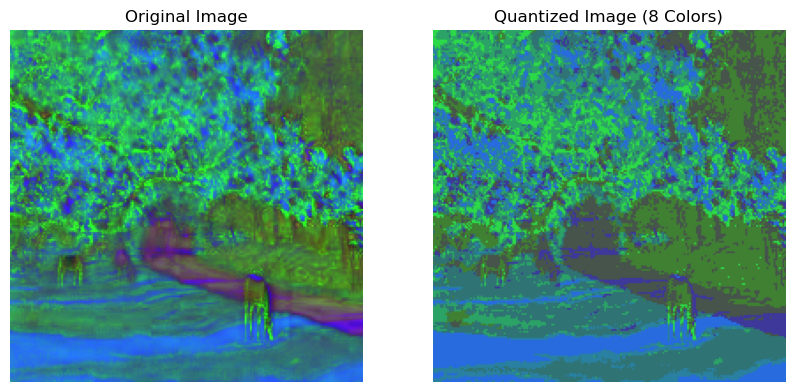

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the colored image
image = cv2.imread(r"C:\Users\Arij\Desktop\RT5\BE\32.jpg")

H_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  

print(image.shape)
pixels = H_image.reshape((-1, 3))


num_colors = 8
"""
check documentation: https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html
v2.TERM_CRITERIA_EPS: determines when k-means should stop
cv2.TERM_CRITERIA_MAX_ITER: max iterations

"""
#k_means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)
_, labels, centers = cv2.kmeans(pixels.astype(np.float32), num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

quantized_centers = np.uint8(centers)
quantized_image = quantized_centers[labels.flatten()].reshape(H_image.shape)


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(H_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(quantized_image)
plt.title(f'Quantized Image ({num_colors} Colors)')
plt.axis('off')

plt.show()


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def calculate_color_histogram(image):
        H_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  
        pixels = H_image.reshape((-1, 3))
        num_colors = 8
        """
        check documentation: https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html
        v2.TERM_CRITERIA_EPS: determines when k-means should stop
        cv2.TERM_CRITERIA_MAX_ITER: max iterations

        """
        #k_means clustering
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)
        _, labels, centers = cv2.kmeans(pixels.astype(np.float32), num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        quantized_centers = np.uint8(centers)
        quantized_image = quantized_centers[labels.flatten()].reshape(H_image.shape)
        return quantized_image


## 1.2. Construction d’un descripteur de texture

In [7]:
import cv2
import numpy as np
def calculate_texture_descriptor(image):
    descriptor=[]
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculer la Transformée de Fourier 2D
    f_transform = np.fft.fft2(gray_img)
   
    # Calculer le spectre en amplitude
    amplitude_spectrum = np.log(np.abs(f_transform) + 1)
    
    # Découper la moitié supérieure gauche
    height, width = amplitude_spectrum.shape
    top_half = amplitude_spectrum[:height//2, :width]
    
    # Découper en 6x3 blocs
    blocks = np.array_split(top_half, 6, axis=0)
    for block in blocks:
        blocks1 = np.array_split(block, 3, axis=1)
    
    
    # Calculer le logarithme de l'énergie moyenne sur chacun des blocs
    for block in blocks:
        for block1 in blocks1:
            descriptor.append(np.mean(np.square(block1)))
    return descriptor
    



# outil 1

In [8]:
import os
import json
image_data = []
image_folder=r"C:\Users\Arij\Desktop\RT5\BE"
for image_file in os.listdir(image_folder):
    image_name=os.path.join(image_folder,image_file)
    image=cv2.imread(image_name)
    color_histogram = calculate_color_histogram(image)
    texture_descriptor = calculate_texture_descriptor(image)
    image_data.append({
        "image_path": image_name,
        "color_histogram": color_histogram.tolist(),
        "texture_descriptor": texture_descriptor
    })

output_file = r"C:\Users\Arij\Desktop\RT5\outil1.json"
with open(output_file, "w") as json_file:
    json.dump(image_data, json_file, indent=4)

print(f"Results saved to {output_file}")

Results saved to C:\Users\Arij\Desktop\RT5\outil1.json


## 2. Recherche d'images

In [22]:
import json
import numpy as np
import os

with open(r"C:\Users\Arij\Desktop\RT5\outil1.json", "r") as json_file:
    image_data = json.load(json_file)

#Euclidean distance
def euclidean_distance(hist1, hist2):
    return np.linalg.norm(hist1 - hist2)

# Manhattan distance
def manhattan_distance(descriptor1, descriptor2):
    return np.sum(np.abs(descriptor1 - descriptor2))


def find_similar_images(image_data,query_path, num_results=3):
    
    query_path = os.path.normpath(query_path)
    query_data = None
    for data in image_data:
        if data["image_path"] == query_path:
            query_data = data
            break

    if query_data is None:
        print("Query image not found.")
        return

    # Calculate distances for color histogram
    color_histogram_distances = []
    for data in image_data:
        if data["image_path"] != query_path:
            distance = euclidean_distance(np.array(query_data["color_histogram"]), np.array(data["color_histogram"]))
            color_histogram_distances.append((data["image_path"], distance))

    # Calculate distances for texture descriptor
    texture_descriptor_distances = []
    for data in image_data:
        if data["image_path"] != query_path:
            distance = manhattan_distance(np.array(query_data["texture_descriptor"]), np.array(data["texture_descriptor"]))
            texture_descriptor_distances.append((data["image_path"], distance))

    # Combine distances from both descriptors
    combined_distances = []
    for i in range(len(image_data)-1):
        color_distance = color_histogram_distances[i][1]
        texture_distance = texture_descriptor_distances[i][1]
        combined_distance = color_distance + texture_distance
        combined_distances.append((color_histogram_distances[i][0], combined_distance))

    # Sort the images based on combined distances
    combined_distances.sort(key=lambda x: x[1])

    # most similar images
    similar_images = [image for image, _ in combined_distances[:num_results]]

    return similar_images

Similar images based on both color histogram and texture descriptor: ['C:\\Users\\Arij\\Desktop\\RT5\\BE\\31.jpg', 'C:\\Users\\Arij\\Desktop\\RT5\\BE\\08.jpg', 'C:\\Users\\Arij\\Desktop\\RT5\\BE\\03.jpg', 'C:\\Users\\Arij\\Desktop\\RT5\\BE\\38.jpg', 'C:\\Users\\Arij\\Desktop\\RT5\\BE\\11.jpg']


In [26]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

def load_and_display_image():
    global loaded_image_path  
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.png *.jpeg")])
    if file_path:
        loaded_image_path = file_path  
        image = Image.open(file_path)

        tk_image = ImageTk.PhotoImage(image)

        image_label.config(image=tk_image)
        image_label.image = tk_image
        global similar_images
        similar_images = find_similar_images(image_data, loaded_image_path)
        display_similar_images(similar_images)



In [28]:
def display_similar_images(similar_images):
    if similar_images is None:
        print("No similar images to display.")
        return

    normalized_images = [os.path.normpath(image_path) for image_path in similar_images]
    print(normalized_images)

    # Clear existing displayed images
    for label in similar_image_labels:
        label.destroy()

    for i, image_path in enumerate(similar_images):
        print(image_path)
        image = Image.open(image_path)
        tk_image = ImageTk.PhotoImage(image)

        # Create a label for each image and display it
        label = tk.Label(image_frame, image=tk_image)
        label.image = tk_image
        label.grid(row=0, column=i)
        similar_image_labels.append(label)

root = tk.Tk()
root.title("Image Loader and Displayer")

loaded_image_path = None

load_button = tk.Button(root, text="Load Image", command=load_and_display_image)
load_button.pack()

image_label = tk.Label(root)
image_label.pack()

search_button = tk.Button(root, text="Rechercher des images similaires", command=lambda: display_similar_images(similar_images))
search_button.pack()

image_frame = tk.Frame(root)
image_frame.pack()

# List to keep track of displayed similar image labels
similar_image_labels = []

root.mainloop()

['C:\\Users\\Arij\\Desktop\\RT5\\BE\\38.jpg', 'C:\\Users\\Arij\\Desktop\\RT5\\BE\\08.jpg', 'C:\\Users\\Arij\\Desktop\\RT5\\BE\\03.jpg']
C:\Users\Arij\Desktop\RT5\BE\38.jpg
C:\Users\Arij\Desktop\RT5\BE\08.jpg
C:\Users\Arij\Desktop\RT5\BE\03.jpg
